In [1]:
from rmgpy.molecule import Molecule
from IPython.display import display
import random

In [2]:
def count_up():
    i=0
    while True:
        i += 1
        yield i

In [3]:
def display_random_alkane(N):
    n = 0
    while n<N:
        counts = count_up()
        fragment_list = [('C', (0, 1)), ('C{0}{1}C{0}', (0, 0.1))]
        ring_list = [4]*5 + [3]*4 + [2]
        smile_string = ''
        while True:
            action_variable = random.normalvariate(0, 1)

            if action_variable < -1:
                fragment = (fragment_list[1][0].format(counts.next(), 'C'*ring_list[random.randint(0, 9)]), fragment_list[1][1])
            elif action_variable < 0.5:
                fragment = fragment_list[0]
            elif smile_string != '':
                break
            else:
                continue

            smile_addition = fragment[0]*(int(random.lognormvariate(*fragment[1]))+1)

            if smile_string == '':
                smile_string = smile_addition
            else:
                index = random.randint(0, len(smile_string)-1)
                if index == 0:
                    smile_string = smile_addition + smile_string
                else:
                    smile_string = smile_string[:index] + '({})'.format(smile_addition) + smile_string[index:]

        try:
            molecule = Molecule().fromSMILES(smile_string)
            molecule.toSMARTS()
            display(molecule)
        except:
            display_random_alkane(1)
            
        n += 1

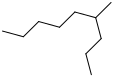

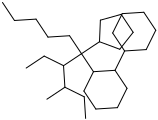

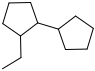

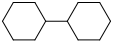

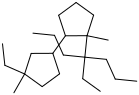

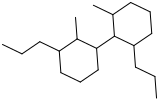

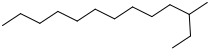

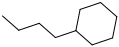

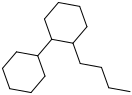

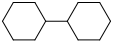

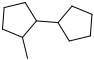

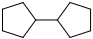

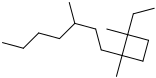

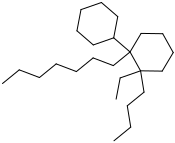

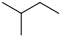

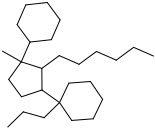

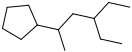

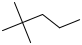

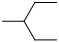

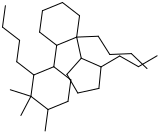

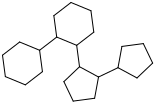

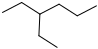

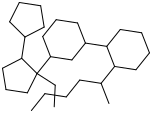

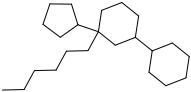

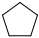

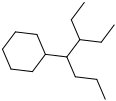

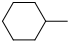

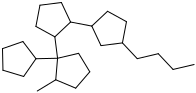

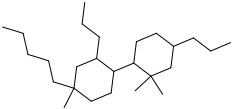

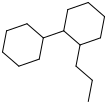

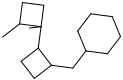

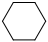

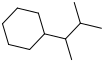

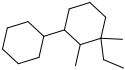

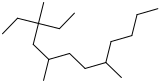

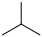

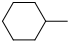

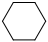

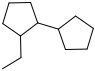

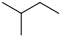

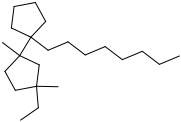

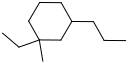

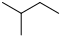

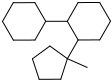

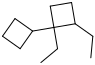

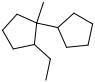

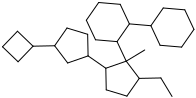

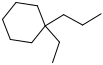

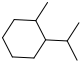

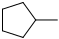

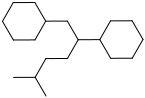

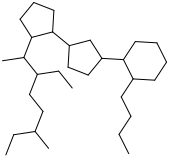

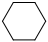

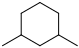

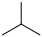

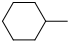

In [4]:
display_random_alkane(100)